
            ░█░█░█▀█░█░█░█▀▀░░░░░█▄█░█▀█░█▀▄░█░█░█░░░█▀█░▀█▀░█▀█░█▀▄
            ░█▄█░█▀█░▀▄▀░█▀▀░▄▄▄░█░█░█░█░█░█░█░█░█░░░█▀█░░█░░█░█░█▀▄
            ░▀░▀░▀░▀░░▀░░▀▀▀░░░░░▀░▀░▀▀▀░▀▀░░▀▀▀░▀▀▀░▀░▀░░▀░░▀▀▀░▀░▀
                                (c) MikeDEV 2023




Ingresa una cadena de 0s y 1s: 01000010
Ingresa la duración de cada bit en segundos: 1
Ingresa la frecuencia de la portadora en Hz: 2
Ingresa la amplitud de la señal modulada: 1


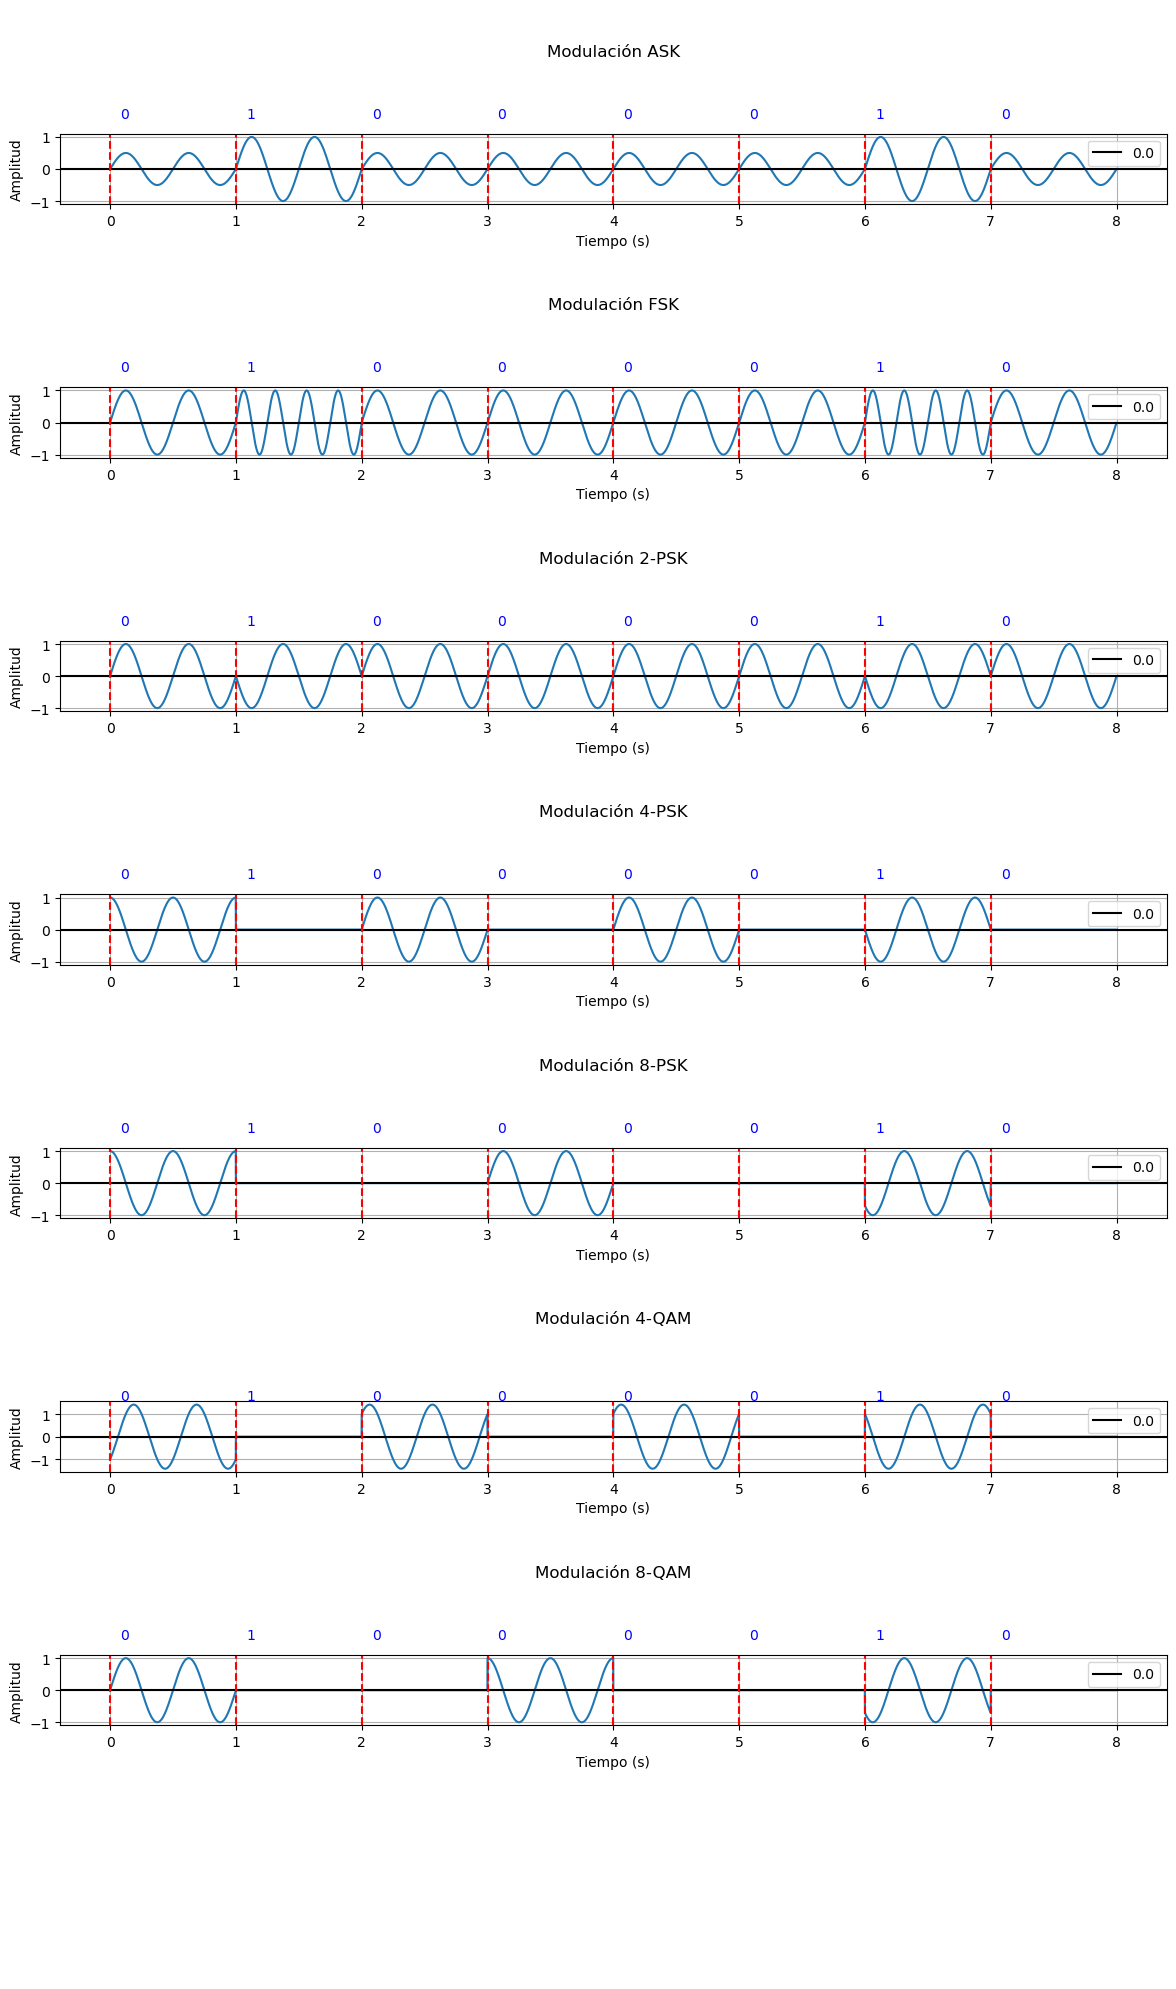

In [2]:
import numpy as np
import matplotlib.pyplot as plt



def ask_modulation(binary_string, bit_duration, high_amplitude, low_amplitude, total_frequency, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    carrier_wave = np.sin(2 * np.pi * total_frequency * time)
    modulated_signal = np.zeros(len(time))
    
    for i, bit in enumerate(binary_string):
        bit_value = int(bit)
        if bit_value == 0:
            signal = low_amplitude * carrier_wave[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)]
        else:
            signal = high_amplitude * carrier_wave[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)]
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

def fsk_modulation(binary_string, bit_duration, frequency_0, frequency_1, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    for i, bit in enumerate(binary_string):
        bit_value = int(bit)
        if bit_value == 0:
            signal = amplitude * np.sin(2 * np.pi * frequency_0 * np.arange(0, bit_duration, 1/form_range))
        else:
            signal = amplitude * np.sin(2 * np.pi * frequency_1 * np.arange(0, bit_duration, 1/form_range))
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

def psk2_modulation(binary_string, bit_duration, carrier_frequency, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    phase_mapping = {
        '0': 0,
        '1': np.pi
    }
    
    for i, bit in enumerate(binary_string):
        phase = phase_mapping[bit]
        signal = amplitude * np.sin(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] + phase)
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

def psk4_modulation(binary_string, bit_duration, carrier_frequency, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    phase_mapping = {'00': 0, '01': np.pi/2, '10': np.pi, '11': 3*np.pi/2}
    
    for i in range(0, len(binary_string), 2):
        dibit = binary_string[i:i+2]
        phase = phase_mapping[dibit]
        signal = amplitude * np.sin(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] + phase)
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

def psk8_modulation(binary_string, bit_duration, carrier_frequency, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    binary_string = binary_string + "1"
    
    phase_mapping = {
        '000': 0,
        '001': np.pi / 4,
        '010': np.pi / 2,
        '011': 3 * np.pi / 4,
        '100': np.pi,
        '101': -3 * np.pi / 4,
        '110': -np.pi / 2,
        '111': -np.pi / 4
    }
    
    for i in range(0, len(binary_string), 3):
        tribit = binary_string[i:i+3]
        phase = phase_mapping[tribit]
        signal = amplitude * np.sin(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] + phase)
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal


def qam4_modulation(binary_string, bit_duration, carrier_frequency, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    mapping = {
        '00': complex(amplitude, amplitude),
        '01': complex(-amplitude, amplitude),
        '10': complex(amplitude, -amplitude),
        '11': complex(-amplitude, -amplitude)
    }
    
    for i in range(0, len(binary_string), 2):
        dibit = binary_string[i:i+2]
        symbol = mapping[dibit]
        signal = np.real(symbol) * np.cos(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)]) + \
                 np.imag(symbol) * np.sin(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)])
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

def qam8_modulation(binary_string, bit_duration, carrier_frequency, amplitude, form_range):
    time = np.arange(0, len(binary_string) * bit_duration, 1 / form_range)
    modulated_signal = np.zeros(len(time))
    
    binary_string = binary_string + "1"
    
    mapping = {
        '000': complex(amplitude * np.cos(0), amplitude * np.sin(0)),
        '001': complex(amplitude * np.cos(np.pi/4), amplitude * np.sin(np.pi/4)),
        '010': complex(amplitude * np.cos(np.pi/2), amplitude * np.sin(np.pi/2)),
        '011': complex(amplitude * np.cos(3*np.pi/4), amplitude * np.sin(3*np.pi/4)),
        '100': complex(amplitude * np.cos(np.pi), amplitude * np.sin(np.pi)),
        '101': complex(amplitude * np.cos(5*np.pi/4), amplitude * np.sin(5*np.pi/4)),
        '110': complex(amplitude * np.cos(3*np.pi/2), amplitude * np.sin(3*np.pi/2)),
        '111': complex(amplitude * np.cos(7*np.pi/4), amplitude * np.sin(7*np.pi/4))
    }
    
    for i in range(0, len(binary_string), 3):
        tribit = binary_string[i:i+3]
        symbol = mapping[tribit]
        signal = np.real(symbol) * np.cos(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)]) + \
                 np.imag(symbol) * np.sin(2 * np.pi * carrier_frequency * time[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)])
        modulated_signal[i*int(bit_duration*form_range):(i+1)*int(bit_duration*form_range)] = signal
    
    return time, modulated_signal

# Función para graficar una técnica de modulación
def plot_modulation(time, modulated_signal, title, ylabel, ytext, bit_ticks=None, bit_labels=None):
    plt.plot(time, modulated_signal)
    plt.axhline(y=0, color='k', linestyle='-', label='0.0')
    plt.title(title)
    plt.xlabel("Tiempo (s)")
    plt.ylabel(ylabel)
    plt.grid()
    if bit_ticks and bit_labels:
        for i, (tick, label) in enumerate(zip(bit_ticks, bit_labels)):
            plt.axvline(x=tick, color='r', linestyle='--')
            plt.text(tick + 0.08, ytext, label, color='b')
    plt.legend()

# Obtener la entrada del usuario
print("""
            ░█░█░█▀█░█░█░█▀▀░░░░░█▄█░█▀█░█▀▄░█░█░█░░░█▀█░▀█▀░█▀█░█▀▄
            ░█▄█░█▀█░▀▄▀░█▀▀░▄▄▄░█░█░█░█░█░█░█░█░█░░░█▀█░░█░░█░█░█▀▄
            ░▀░▀░▀░▀░░▀░░▀▀▀░░░░░▀░▀░▀▀▀░▀▀░░▀▀▀░▀▀▀░▀░▀░░▀░░▀▀▀░▀░▀
                                (c) MikeDEV 2023 v1.0.3
""")
print("\n\n")

binary_input = input("Ingresa una cadena de 0s y 1s: ")
bit_duration = float(input("Ingresa la duración de cada bit en segundos: "))
carrier_frequency = float(input("Ingresa la frecuencia de la portadora en Hz: "))
amplitude = float(input("Ingresa la amplitud de la señal modulada: "))
form_range = 1000

# Obtener señales moduladas para cada técnica
time_qam4, modulated_signal_qam4 = qam4_modulation(binary_input, bit_duration, carrier_frequency, amplitude, form_range)
time_qam8, modulated_signal_qam8 = qam8_modulation(binary_input, bit_duration, carrier_frequency, amplitude, form_range)
time_ask, modulated_signal_ask = ask_modulation(binary_input, bit_duration, 1, 0.5, carrier_frequency, form_range)
time_fsk, modulated_signal_fsk = fsk_modulation(binary_input, bit_duration, 2, 4, amplitude, form_range)
time_psk2, modulated_signal_psk2 = psk2_modulation(binary_input, bit_duration, carrier_frequency, amplitude, form_range)
time_psk4, modulated_signal_psk4 = psk4_modulation(binary_input, bit_duration, carrier_frequency, amplitude, form_range)
time_psk8, modulated_signal_psk8 = psk8_modulation(binary_input, bit_duration, carrier_frequency, amplitude, form_range)

# Configuración general para todas las subtramas
num_rows = 8
plt.figure(figsize=(12, num_rows * 2.5))

# Crear subtramas para cada técnica de modulación
modulation_techniques = [
    ("ASK", modulated_signal_ask, time_ask, binary_input, amplitude + 0.6),
    ("FSK", modulated_signal_fsk, time_fsk, binary_input, amplitude + 0.6),
    ("2-PSK", modulated_signal_psk2, time_psk2, binary_input, amplitude + 0.6),
    ("4-PSK", modulated_signal_psk4, time_psk4, binary_input, amplitude + 0.6),
    ("8-PSK", modulated_signal_psk8, time_psk8, binary_input, amplitude + 0.6),
    ("4-QAM", modulated_signal_qam4, time_qam4, binary_input, amplitude + 0.6),
    ("8-QAM", modulated_signal_qam8, time_qam8, binary_input, amplitude + 0.6)
]

# Generar las subtramas
for idx, (title, modulated_signal, time, bit_input, ytext) in enumerate(modulation_techniques, start=1):
    plt.subplot(num_rows, 1, idx)
    bit_ticks = [i * bit_duration for i in range(len(bit_input))]
    plot_modulation(time, modulated_signal, f"\n\nModulación {title}\n\n\n\n", "Amplitud", ytext, bit_ticks=bit_ticks, bit_labels=bit_input)

# Configuración de la última subtrama
plt.subplot(num_rows, 1, num_rows)
plt.axis('off')  # Dejamos esta gráfica en blanco para ajustar el diseño
plt.tight_layout()

# Mostrar las subtramas
plt.show()